In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

TABULAR_PATH = 'data/tabular/'
os.listdir(TABULAR_PATH)

['Number of schools per brgy.xlsx', 'Population 2010, 2015 ARMM,BCT.xlsx']

In [2]:
def get_info(df):
    info_df = df.describe(include='all').T
    info_df['dtypes'] = df.dtypes
    info_df['missing'] = df.isna().sum()
    return info_df

## Schools Data

In [3]:
schools_data = pd.read_excel(TABULAR_PATH+'Number of schools per brgy.xlsx')
print('Dimension:',schools_data.shape)
schools_data.head()

Dimension: (1570, 7)


,PROV,PSGC_PROV,CITY/MUNI,PSGC_CITY/MUNI,BRGY,PSGC_BRGY,Number of School
0,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Arco,PH150702001,1
1,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Ba-as,PH150702002,1
2,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balagtasan,PH150702005,1
3,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balas,PH150702006,1
4,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balobo,PH150702007,1


In [4]:
get_info(schools_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
PROV,1570,5,LANAO DEL SUR,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,1570,5,PH153600000,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
CITY/MUNI,1570,117,PARANG,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_CITY/MUNI,1570,118,PH156612000,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BRGY,1570,1524,Poblacion,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_BRGY,1570,1570,PH156601024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of School,1570,NaN,NaN,NaN,1.72675,1.43918,1,1,1,2,15,int64,0


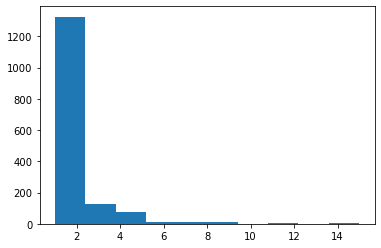

In [5]:
plt.hist(schools_data['Number of School'].values)
plt.show()

In [6]:
schools_data.groupby('PROV')['Number of School']\
            .sum()\
            .sort_values(ascending=False)

PROV
LANAO DEL SUR    978
MAGUINDANAO      709
SULU             479
TAWI-TAWI        304
BASILAN          241
Name: Number of School, dtype: int64

In [7]:
schools_data.groupby('CITY/MUNI')['Number of School']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

CITY/MUNI
CITY OF MARAWI (Capital)           97
PARANG                             84
BONGAO (Capital)                   84
BACOLOD-KALAWI (BACOLOD GRANDE)    81
DATU ODIN SINSUAT (DINAIG)         64
BALINDONG (WATU)                   61
CITY OF LAMITAN (Capital)          61
SIASI                              58
BAYANG                             55
MASIU                              51
JOLO (Capital)                     49
UPI                                48
BINIDAYAN                          46
BALABAGAN                          43
SOUTH UPI                          43
TALIPAO                            42
WAO                                39
BARIRA                             39
SULTAN KUDARAT (NULING)            38
SUMISIP                            37
Name: Number of School, dtype: int64

In [8]:
schools_data.groupby('BRGY')['Number of School']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

BRGY
Poblacion               38
Bongao Poblacion        15
Pindolonan              15
San Raymundo            13
Awang                   12
Lumbac                  12
Romangaob (Pob.)        11
Gadongan                 9
Asturias                 9
Ilian                    9
Raya                     9
Barira (Pob.)            9
Bagoaingud               8
Walled City (Pob.)       8
Basak Malutlut           8
Bualan                   8
Bus-bus                  8
Cadayonan                8
Landasan (Sarmiento)     8
Poblacion II             8
Name: Number of School, dtype: int64

## Population Data

In [9]:
population_data = pd.read_excel(TABULAR_PATH+'Population 2010, 2015 ARMM,BCT.xlsx')
population_data.head()

,REGI,PSGC_REGI,PROV,PSGC_PROV,MuniCities,PSGC_CITY/MUNI,BrgyName,PSGC_BRGY,BCT,Pop2010,...,80_abv_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,80_abv_fem
0,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Arco,PH150702001,1,800,...,3.0,23.0,0.0,1.0,3.0,0.0,8.0,6.0,2.0,3.0
1,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Ba-as,PH150702002,1,1266,...,3.0,72.0,0.0,9.0,13.0,16.0,13.0,14.0,7.0,0.0
2,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Baimbing,PH150702004,1,451,...,0.0,25.0,0.0,4.0,1.0,3.0,4.0,8.0,4.0,1.0
3,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balagtasan,PH150702005,1,2597,...,6.0,76.0,1.0,2.0,10.0,18.0,24.0,7.0,13.0,1.0
4,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balas,PH150702006,1,2809,...,2.0,166.0,2.0,26.0,39.0,28.0,32.0,28.0,7.0,4.0


In [10]:
with pd.option_context('display.max_rows', None): 
    display(get_info(population_data))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REGI,2721,4,Autonomous Region In Muslim Mindanao,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_REGI,2721,4,PH150000000,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PROV,2721,9,Lanao Del Sur,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,2721,9,PH153600000,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
MuniCities,2721,131,Marawi City,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_CITY/MUNI,2721,132,PH153617000,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BrgyName,2721,2248,Pindolonan,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_BRGY,2721,2721,PH153633043,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BCT,2721,NaN,NaN,NaN,1.08784,0.283107,1,1,1,1,2,int64,0
Pop2010,2721,NaN,NaN,NaN,1409.6,1699.75,0,605,988,1624,36622,int64,0


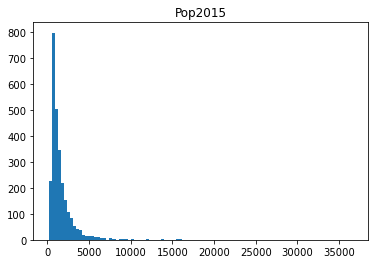

In [11]:
plt.hist(population_data['Pop2015'].values,bins=100)
plt.title('Pop2015')
plt.show()

In [12]:
population_data.groupby('PROV')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)

PROV
Maguindanao                         1162435
Lanao Del Sur                       1045429
Sulu                                 824731
Tawi-Tawi                            390715
Basilan                              346579
Cotabato City (Not A Province)       299438
Lanao Del Norte                      159930
Cotabato (North Cotabato)            114369
City Of Isabela (Not A Province)     112788
Name: Pop2015, dtype: int64

In [13]:
population_data.groupby('MuniCities')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

MuniCities
Cotabato City                       299438
Marawi City                         201785
Parang                              149960
Jolo                                125564
City Of Isabela (Not A Province)    112788
Bongao                              100527
Datu Odin Sinsuat (Dinaig)           99210
Sultan Kudarat (Nuling)              95201
Indanan                              80883
Talipao                              80255
City Of Lamitan                      74782
Siasi                                67705
Patikul                              62287
Baloi                                58383
Upi                                  53583
Buluan                               50008
Wao                                  45862
Pikit                                45737
Panglima Sugala (Balimbing)          44184
Malabang                             43957
Name: Pop2015, dtype: int64

In [14]:
population_data.groupby('BrgyName')['Pop2015']\
            .sum()\
            .sort_values(ascending=False)\
            .head(20)

BrgyName
Poblacion               91896
Bus-bus                 36650
Asturias                23085
Tamontaka               22085
Poblacion II            20534
Bagua II                19720
Bagua                   18137
Anuling                 17504
Landasan (Sarmiento)    16971
San Raymundo            16143
Kalanganan              15995
Kajatian                15845
Rosary Heights X        15732
Poblacion VII           15712
Pindolonan              14619
Tulay                   14406
Dalican Poblacion       14094
Rosary Heights          13943
Bongao Poblacion        12503
Awang                   11897
Name: Pop2015, dtype: int64